## The plan

#### Merge manufacturing codes with past year work order history 
#### Add column late 0 or 1 
#### Days late 
#### Days early
#### Note that for any machine learning project, days late and days early will have to be remove as it will not be a valid input


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
history=pd.read_excel('WO_History_-_D49.xls', skiprows=1)

In [3]:
history

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,WOTYPE,CREATED BY,STS,PRIMARY WC,ITEM DESC,SCH DT CHG CNT
0,D49,X20,2021-10-04,2021-10-04,2021-10-04,1340320,BC-658506-015,70,70,0,R,B124737,70,X5120,"RETAINER, INSERT -TVB SPECIAL",0
1,D49,X20,2021-05-28,2021-06-22,2021-06-25,6332300,BC-658506-015,80,79,0,N,B125342,75,X5120,"RETAINER, INSERT -TVB SPECIAL",1
2,D49,X20,2021-07-06,2021-08-04,2021-07-28,6648350,BC-658506-015,65,75,0,N,B125342,70,X5120,"RETAINER, INSERT -TVB SPECIAL",1
3,D49,X20,2021-11-04,2022-05-31,2021-11-22,1600730,BC-658506-015,60,59,0,N,B125342,75,X5120,"RETAINER, INSERT -TVB SPECIAL",1
4,D49,X20,2021-12-27,2022-02-23,2022-01-11,2031520,BC-658506-015,75,75,1,N,B125342,70,X5120,"RETAINER, INSERT -TVB SPECIAL",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,D49,545,2022-01-11,2022-08-31,2022-03-18,2117920,99-587867-09A,20,9,0,N,B125342,75,F5171,RCPT SHELL-NATC09Y A DSGN,1
7652,D49,X66,2021-04-01,2021-03-11,2021-05-03,5877060,99-804905-014,25,29,0,N,B125342,70,X5184,COUP'RING,0
7653,D49,X66,2022-03-29,2022-05-07,NaT,2824280,99-804905-020,130,0,0,N,B125342,10,X5184,COUPL RING,0
7654,D49,P81,2022-03-25,2022-04-30,2022-04-26,2791680,99-823956-221,25,24,2,N,B125342,50,P5128,ADAPTER,0


In [4]:
history['Days Late']=history['DT COMPLETED']-history['DUE DT']

In [5]:
history

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,WOTYPE,CREATED BY,STS,PRIMARY WC,ITEM DESC,SCH DT CHG CNT,Days Late
0,D49,X20,2021-10-04,2021-10-04,2021-10-04,1340320,BC-658506-015,70,70,0,R,B124737,70,X5120,"RETAINER, INSERT -TVB SPECIAL",0,0 days
1,D49,X20,2021-05-28,2021-06-22,2021-06-25,6332300,BC-658506-015,80,79,0,N,B125342,75,X5120,"RETAINER, INSERT -TVB SPECIAL",1,3 days
2,D49,X20,2021-07-06,2021-08-04,2021-07-28,6648350,BC-658506-015,65,75,0,N,B125342,70,X5120,"RETAINER, INSERT -TVB SPECIAL",1,-7 days
3,D49,X20,2021-11-04,2022-05-31,2021-11-22,1600730,BC-658506-015,60,59,0,N,B125342,75,X5120,"RETAINER, INSERT -TVB SPECIAL",1,-190 days
4,D49,X20,2021-12-27,2022-02-23,2022-01-11,2031520,BC-658506-015,75,75,1,N,B125342,70,X5120,"RETAINER, INSERT -TVB SPECIAL",1,-43 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,D49,545,2022-01-11,2022-08-31,2022-03-18,2117920,99-587867-09A,20,9,0,N,B125342,75,F5171,RCPT SHELL-NATC09Y A DSGN,1,-166 days
7652,D49,X66,2021-04-01,2021-03-11,2021-05-03,5877060,99-804905-014,25,29,0,N,B125342,70,X5184,COUP'RING,0,53 days
7653,D49,X66,2022-03-29,2022-05-07,NaT,2824280,99-804905-020,130,0,0,N,B125342,10,X5184,COUPL RING,0,NaT
7654,D49,P81,2022-03-25,2022-04-30,2022-04-26,2791680,99-823956-221,25,24,2,N,B125342,50,P5128,ADAPTER,0,-4 days


In [6]:
history['Days Late Int']=history['Days Late'].dt.days

In [7]:
history

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,WOTYPE,CREATED BY,STS,PRIMARY WC,ITEM DESC,SCH DT CHG CNT,Days Late,Days Late Int
0,D49,X20,2021-10-04,2021-10-04,2021-10-04,1340320,BC-658506-015,70,70,0,R,B124737,70,X5120,"RETAINER, INSERT -TVB SPECIAL",0,0 days,0.0
1,D49,X20,2021-05-28,2021-06-22,2021-06-25,6332300,BC-658506-015,80,79,0,N,B125342,75,X5120,"RETAINER, INSERT -TVB SPECIAL",1,3 days,3.0
2,D49,X20,2021-07-06,2021-08-04,2021-07-28,6648350,BC-658506-015,65,75,0,N,B125342,70,X5120,"RETAINER, INSERT -TVB SPECIAL",1,-7 days,-7.0
3,D49,X20,2021-11-04,2022-05-31,2021-11-22,1600730,BC-658506-015,60,59,0,N,B125342,75,X5120,"RETAINER, INSERT -TVB SPECIAL",1,-190 days,-190.0
4,D49,X20,2021-12-27,2022-02-23,2022-01-11,2031520,BC-658506-015,75,75,1,N,B125342,70,X5120,"RETAINER, INSERT -TVB SPECIAL",1,-43 days,-43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,D49,545,2022-01-11,2022-08-31,2022-03-18,2117920,99-587867-09A,20,9,0,N,B125342,75,F5171,RCPT SHELL-NATC09Y A DSGN,1,-166 days,-166.0
7652,D49,X66,2021-04-01,2021-03-11,2021-05-03,5877060,99-804905-014,25,29,0,N,B125342,70,X5184,COUP'RING,0,53 days,53.0
7653,D49,X66,2022-03-29,2022-05-07,NaT,2824280,99-804905-020,130,0,0,N,B125342,10,X5184,COUPL RING,0,NaT,NaN
7654,D49,P81,2022-03-25,2022-04-30,2022-04-26,2791680,99-823956-221,25,24,2,N,B125342,50,P5128,ADAPTER,0,-4 days,-4.0


In [8]:
conditions = [
    (history['Days Late Int'] < 0),
    (history['Days Late Int'] >= 0)]

values = [0, 1]

history['Late (y/n)'] = np.select(conditions, values)

In [9]:
history

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,WOTYPE,CREATED BY,STS,PRIMARY WC,ITEM DESC,SCH DT CHG CNT,Days Late,Days Late Int,Late (y/n)
0,D49,X20,2021-10-04,2021-10-04,2021-10-04,1340320,BC-658506-015,70,70,0,R,B124737,70,X5120,"RETAINER, INSERT -TVB SPECIAL",0,0 days,0.0,1
1,D49,X20,2021-05-28,2021-06-22,2021-06-25,6332300,BC-658506-015,80,79,0,N,B125342,75,X5120,"RETAINER, INSERT -TVB SPECIAL",1,3 days,3.0,1
2,D49,X20,2021-07-06,2021-08-04,2021-07-28,6648350,BC-658506-015,65,75,0,N,B125342,70,X5120,"RETAINER, INSERT -TVB SPECIAL",1,-7 days,-7.0,0
3,D49,X20,2021-11-04,2022-05-31,2021-11-22,1600730,BC-658506-015,60,59,0,N,B125342,75,X5120,"RETAINER, INSERT -TVB SPECIAL",1,-190 days,-190.0,0
4,D49,X20,2021-12-27,2022-02-23,2022-01-11,2031520,BC-658506-015,75,75,1,N,B125342,70,X5120,"RETAINER, INSERT -TVB SPECIAL",1,-43 days,-43.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,D49,545,2022-01-11,2022-08-31,2022-03-18,2117920,99-587867-09A,20,9,0,N,B125342,75,F5171,RCPT SHELL-NATC09Y A DSGN,1,-166 days,-166.0,0
7652,D49,X66,2021-04-01,2021-03-11,2021-05-03,5877060,99-804905-014,25,29,0,N,B125342,70,X5184,COUP'RING,0,53 days,53.0,1
7653,D49,X66,2022-03-29,2022-05-07,NaT,2824280,99-804905-020,130,0,0,N,B125342,10,X5184,COUPL RING,0,NaT,NaN,0
7654,D49,P81,2022-03-25,2022-04-30,2022-04-26,2791680,99-823956-221,25,24,2,N,B125342,50,P5128,ADAPTER,0,-4 days,-4.0,0


In [10]:
history['MA'] = history['Days Late Int'].rolling(window=10).mean()

In [11]:
history_completed= history.dropna(subset=['DT COMPLETED'])

In [12]:
# sort by due date

history_completed=history_completed.sort_values(by=['DT COMPLETED'])

In [13]:
history_completed['MA'] = history_completed['Days Late Int'].rolling(window=20).mean()

In [14]:
history_completed

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,WOTYPE,CREATED BY,STS,PRIMARY WC,ITEM DESC,SCH DT CHG CNT,Days Late,Days Late Int,Late (y/n),MA
7102,D49,P70,2021-01-05,2020-11-25,2021-01-07,5151260,21-033467-146,380,380,1,N,B125342,75,NaN,"INSULTATOR, SPLIT -10G BASE-T",1,43 days,43.0,1,NaN
5708,D49,X67,2021-01-05,2020-11-16,2021-01-08,5151040,10-660424-17B,20,19,1,N,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,53 days,53.0,1,NaN
5712,D49,X67,2021-01-05,2020-11-12,2021-01-08,5151060,10-660424-25B,50,49,1,N,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,57 days,57.0,1,NaN
5484,D49,P56,2021-01-06,2020-08-27,2021-01-08,5152870,10-646069-148,25,19,7,N,B125342,70,P5128,"PLATE, ALIGNMENT -21-65",0,134 days,134.0,1,NaN
7478,D49,F46,2021-01-05,2021-01-14,2021-01-11,5151880,21-113597-020,25,25,0,N,B125342,70,F5176,RING,0,-3 days,-3.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5472,D49,P56,2022-03-25,2022-05-23,2022-04-28,2792860,10-646069-101,110,109,1,N,B125342,50,P5128,"PLATE, ALIGNMENT -19-AB",1,-25 days,-25.0,0,3.20
6445,D49,P57,2022-03-21,2022-02-22,2022-04-28,2749510,10-768190-25B,30,31,0,N,B125342,50,P5116,"SHELL, RCPT -XXN",0,65 days,65.0,1,5.75
1030,D49,F46,2022-03-29,2022-04-29,2022-04-28,2826490,SF-114564-179,25,28,1,N,B125342,50,F5176,SHELL ASSY,0,-1 days,-1.0,0,3.85
3486,D49,X65,2022-03-17,2022-04-08,2022-04-28,2716920,T9-8709-10E,60,60,1,N,B125342,50,X5162,LANYARD RING,0,20 days,20.0,1,-3.65


In [15]:
history.to_excel('check.xls')

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_20168/3223491685.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  history.to_excel('check.xls')


In [16]:
history_completed.to_excel('check2.xls')

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_20168/3954479614.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  history_completed.to_excel('check2.xls')


PermissionError: [Errno 13] Permission denied: 'check2.xls'

In [18]:
reliance=history_completed

In [19]:
reliance=reliance.set_index('DT COMPLETED')

In [20]:
reliance

,DEPT,B/P,CREATED,DUE DT,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,WOTYPE,CREATED BY,STS,PRIMARY WC,ITEM DESC,SCH DT CHG CNT,Days Late,Days Late Int,Late (y/n),MA
DT COMPLETED,,,,,,,,,,,,,,,,,,,
2021-01-07,D49,P70,2021-01-05,2020-11-25,5151260,21-033467-146,380,380,1,N,B125342,75,NaN,"INSULTATOR, SPLIT -10G BASE-T",1,43 days,43.0,1,NaN
2021-01-08,D49,X67,2021-01-05,2020-11-16,5151040,10-660424-17B,20,19,1,N,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,53 days,53.0,1,NaN
2021-01-08,D49,X67,2021-01-05,2020-11-12,5151060,10-660424-25B,50,49,1,N,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,57 days,57.0,1,NaN
2021-01-08,D49,P56,2021-01-06,2020-08-27,5152870,10-646069-148,25,19,7,N,B125342,70,P5128,"PLATE, ALIGNMENT -21-65",0,134 days,134.0,1,NaN
2021-01-11,D49,F46,2021-01-05,2021-01-14,5151880,21-113597-020,25,25,0,N,B125342,70,F5176,RING,0,-3 days,-3.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-28,D49,P56,2022-03-25,2022-05-23,2792860,10-646069-101,110,109,1,N,B125342,50,P5128,"PLATE, ALIGNMENT -19-AB",1,-25 days,-25.0,0,3.20
2022-04-28,D49,P57,2022-03-21,2022-02-22,2749510,10-768190-25B,30,31,0,N,B125342,50,P5116,"SHELL, RCPT -XXN",0,65 days,65.0,1,5.75
2022-04-28,D49,F46,2022-03-29,2022-04-29,2826490,SF-114564-179,25,28,1,N,B125342,50,F5176,SHELL ASSY,0,-1 days,-1.0,0,3.85


<AxesSubplot:xlabel='DT COMPLETED'>

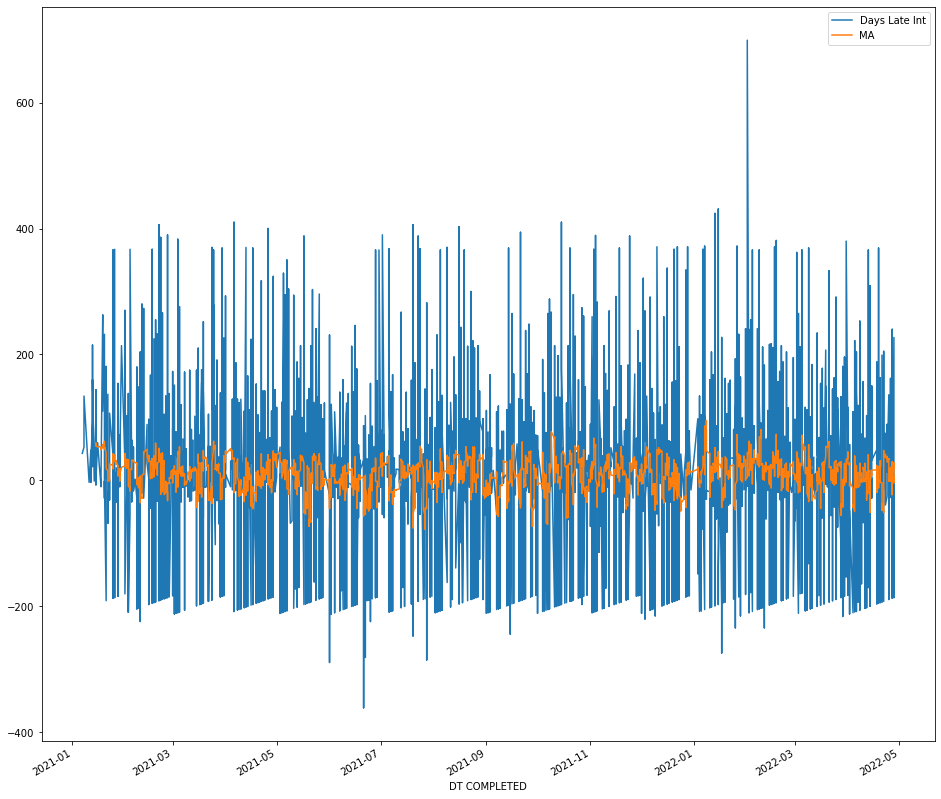

In [21]:
reliance[['Days Late Int', 'MA']].plot(label='Days Late', 
                                  figsize=(16, 15))

In [22]:
#Last 6 months of Dt completed


reliance_8=reliance.loc['2021-06-01':'2022-04-29']

In [23]:
reliance_8

,DEPT,B/P,CREATED,DUE DT,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,WOTYPE,CREATED BY,STS,PRIMARY WC,ITEM DESC,SCH DT CHG CNT,Days Late,Days Late Int,Late (y/n),MA
DT COMPLETED,,,,,,,,,,,,,,,,,,,
2021-06-01,D49,P57,2021-05-20,2021-06-24,6269080,SF-645771-16H,230,228,3,N,B125342,70,P5116,"SHELL, RCPT -NI ALLOY -N",0,-23 days,-23.0,0,-0.60
2021-06-01,D49,XRS,2021-05-10,2021-06-16,6172970,BT-8312-22E,100,97,0,N,B125342,75,G3002,"SPACER , SOCKET INSERT",1,-15 days,-15.0,0,-1.85
2021-06-01,D49,P57,2021-05-17,2021-06-07,6236670,10-660424-11B,40,43,0,N,B125342,70,P5116,"SHELL, RCPT -TVP00R -XXN",0,-6 days,-6.0,0,-3.70
2021-06-01,D49,F46,2021-04-13,2021-04-28,5959090,21-117152-129,30,28,1,N,B125342,75,F5176,CPLG NUT,1,34 days,34.0,1,-6.90
2021-06-01,D49,P57,2021-03-30,2021-05-24,5864110,SF-645771-14H,250,246,4,N,B125342,70,P5116,"SHELL, RCPT -NI ALLOY -N",1,8 days,8.0,1,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-28,D49,P56,2022-03-25,2022-05-23,2792860,10-646069-101,110,109,1,N,B125342,50,P5128,"PLATE, ALIGNMENT -19-AB",1,-25 days,-25.0,0,3.20
2022-04-28,D49,P57,2022-03-21,2022-02-22,2749510,10-768190-25B,30,31,0,N,B125342,50,P5116,"SHELL, RCPT -XXN",0,65 days,65.0,1,5.75
2022-04-28,D49,F46,2022-03-29,2022-04-29,2826490,SF-114564-179,25,28,1,N,B125342,50,F5176,SHELL ASSY,0,-1 days,-1.0,0,3.85


<AxesSubplot:xlabel='DT COMPLETED'>

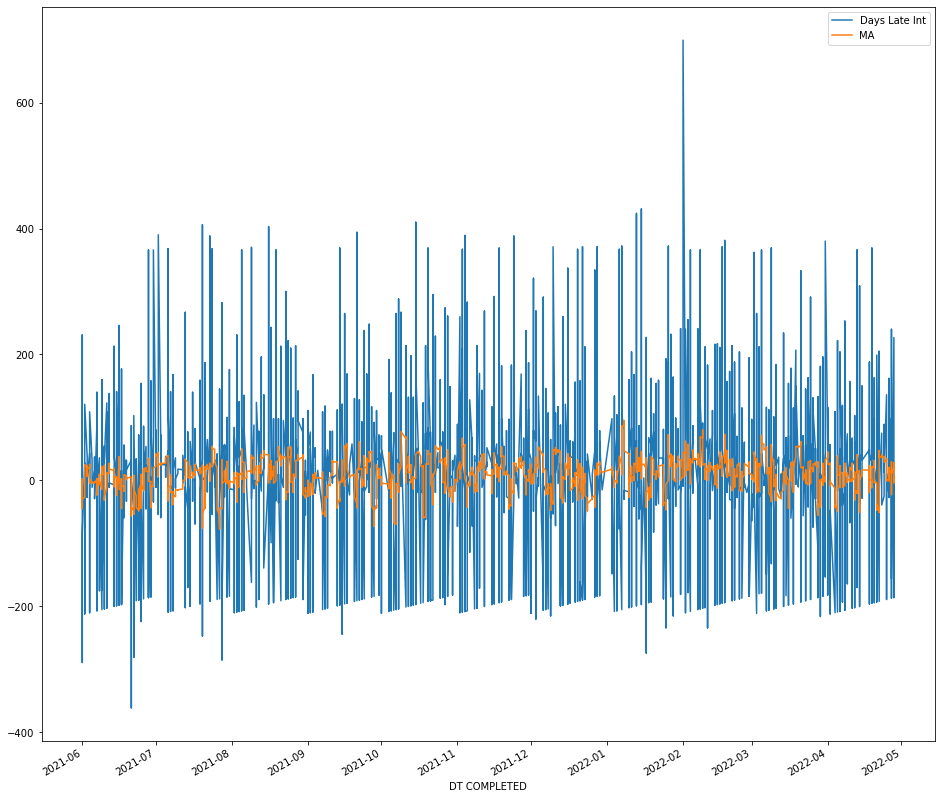

In [24]:
reliance_8[['Days Late Int', 'MA']].plot(label='Days Late', 
                                  figsize=(16, 15))

In [25]:
reliance_4=reliance.loc['2022-01-01':'2022-04-29']
reliance_2=reliance.loc['2022-03-01':'2022-04-29']
reliance_1=reliance.loc['2022-04-01':'2022-04-29']

<AxesSubplot:xlabel='DT COMPLETED'>

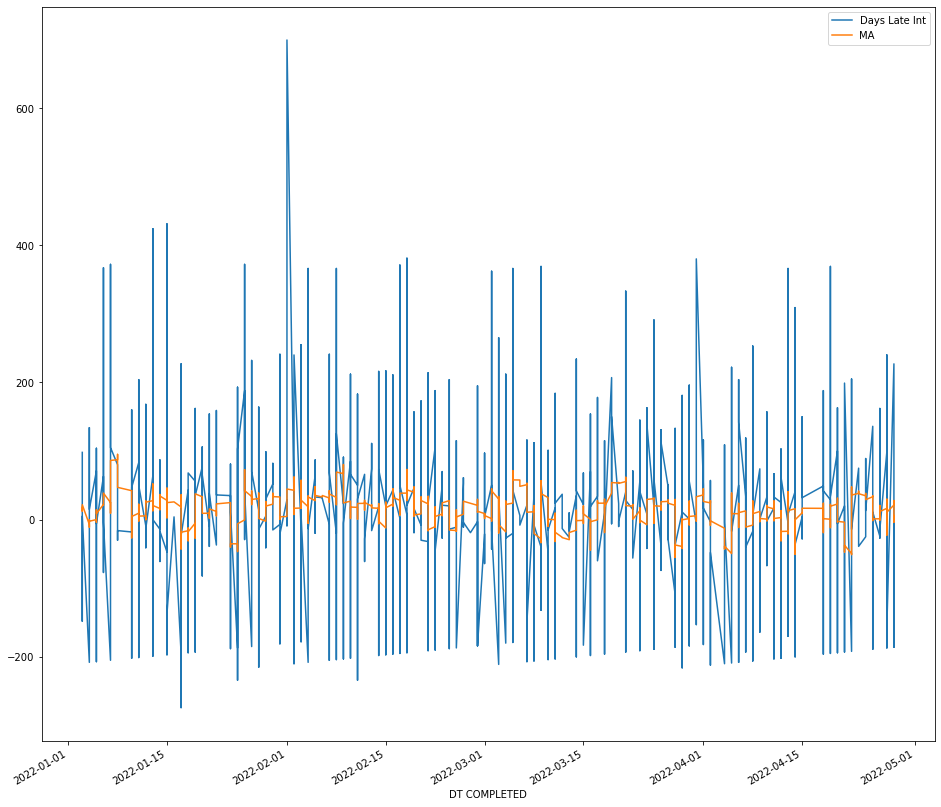

In [26]:
reliance_4[['Days Late Int', 'MA']].plot(label='Days Late', 
                                  figsize=(16, 15))

<AxesSubplot:xlabel='DT COMPLETED'>

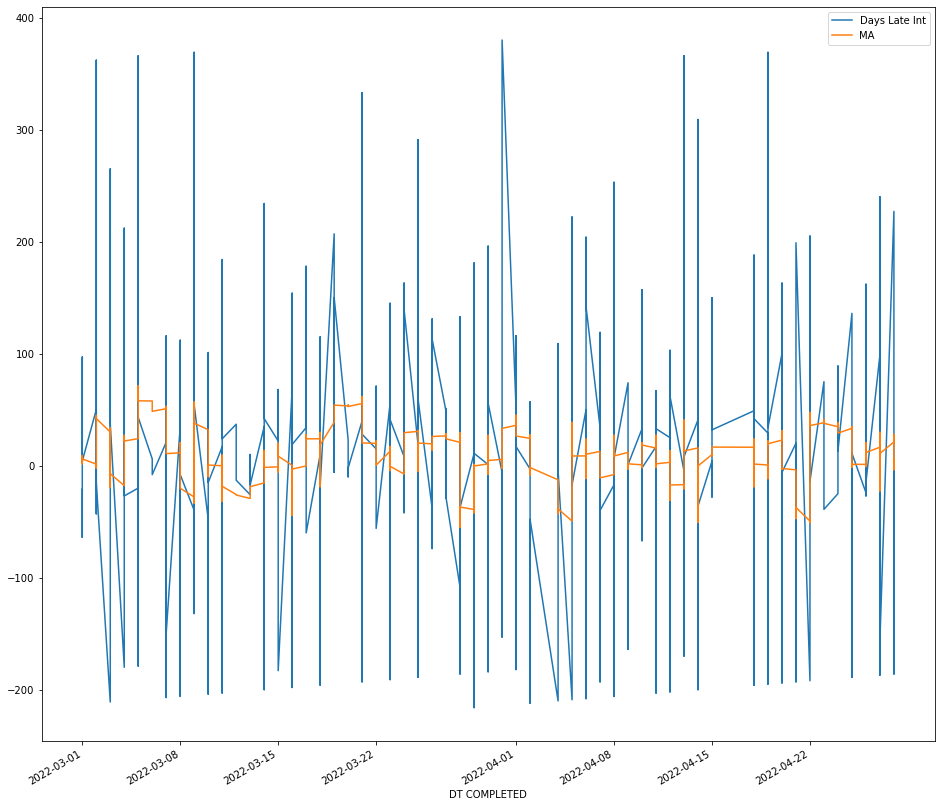

In [27]:
reliance_2[['Days Late Int', 'MA']].plot(label='Days Late', 
                                  figsize=(16, 15))

<AxesSubplot:xlabel='DT COMPLETED'>

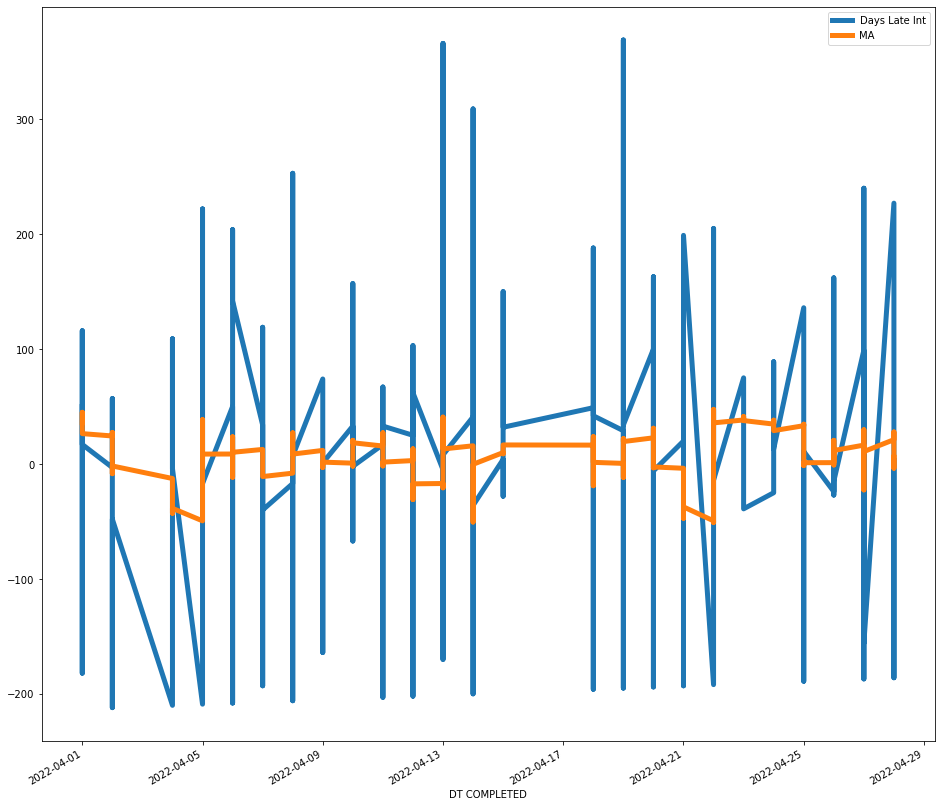

In [133]:
reliance_1[['Days Late Int', 'MA']].plot.line(label='Days Late', 
                                  figsize=(16, 15), linewidth=5)

# Subset analysis:

### Business Unit

### Manufacturing Code Breakdown



In [29]:
history_completed['Count']=1


In [30]:
history_completed

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,...,CREATED BY,STS,PRIMARY WC,ITEM DESC,SCH DT CHG CNT,Days Late,Days Late Int,Late (y/n),MA,Count
7102,D49,P70,2021-01-05,2020-11-25,2021-01-07,5151260,21-033467-146,380,380,1,...,B125342,75,NaN,"INSULTATOR, SPLIT -10G BASE-T",1,43 days,43.0,1,NaN,1
5708,D49,X67,2021-01-05,2020-11-16,2021-01-08,5151040,10-660424-17B,20,19,1,...,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,53 days,53.0,1,NaN,1
5712,D49,X67,2021-01-05,2020-11-12,2021-01-08,5151060,10-660424-25B,50,49,1,...,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,57 days,57.0,1,NaN,1
5484,D49,P56,2021-01-06,2020-08-27,2021-01-08,5152870,10-646069-148,25,19,7,...,B125342,70,P5128,"PLATE, ALIGNMENT -21-65",0,134 days,134.0,1,NaN,1
7478,D49,F46,2021-01-05,2021-01-14,2021-01-11,5151880,21-113597-020,25,25,0,...,B125342,70,F5176,RING,0,-3 days,-3.0,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5472,D49,P56,2022-03-25,2022-05-23,2022-04-28,2792860,10-646069-101,110,109,1,...,B125342,50,P5128,"PLATE, ALIGNMENT -19-AB",1,-25 days,-25.0,0,3.20,1
6445,D49,P57,2022-03-21,2022-02-22,2022-04-28,2749510,10-768190-25B,30,31,0,...,B125342,50,P5116,"SHELL, RCPT -XXN",0,65 days,65.0,1,5.75,1
1030,D49,F46,2022-03-29,2022-04-29,2022-04-28,2826490,SF-114564-179,25,28,1,...,B125342,50,F5176,SHELL ASSY,0,-1 days,-1.0,0,3.85,1
3486,D49,X65,2022-03-17,2022-04-08,2022-04-28,2716920,T9-8709-10E,60,60,1,...,B125342,50,X5162,LANYARD RING,0,20 days,20.0,1,-3.65,1


In [31]:
manu_code=pd.read_excel('upload_4_29.xls')

In [32]:
manu_code

,CO,PART NUMBER,PART TYPE,PART SUB TYPE,PART SIZE,PART FAMILY SERIES,PART FRONT FEATURES,PART BACK FEATURES,RAW MATERIAL TYPE,RAW MATERIAL SHAPE,RAW SIZE,SECOND RAW MAT DIM
0,100,AN960JD1816L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,100,AN960JD2616L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,100,AR-109161-03B,S,Z,ZZ,Y,NaN,NaN,A,Z,0.0,0.0
3,100,AR-139131-004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,100,AR-140000-008,H,Z,ZZ,Y,NaN,NaN,A,H,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34795,100,10-667428-40B,S,B,40,G,NaN,NaN,A,C,0.0,0.0
34796,100,10-564863-36B,S,Z,36,Z,NaN,NaN,A,U,0.0,0.0
34797,100,SF-114564-179,S,Z,17,Y,NaN,NaN,A,F,0.0,0.0
34798,100,47-098485-007,S,B,ZZ,Y,NaN,NaN,B,C,0.0,0.0


In [57]:
merge = pd.merge(history_completed, manu_code, how="left", on="PART NUMBER")

In [58]:
pd.set_option("display.max_columns", None)

In [59]:
merge

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,WOTYPE,CREATED BY,STS,PRIMARY WC,ITEM DESC,SCH DT CHG CNT,Days Late,Days Late Int,Late (y/n),MA,Count,CO,PART TYPE,PART SUB TYPE,PART SIZE,PART FAMILY SERIES,PART FRONT FEATURES,PART BACK FEATURES,RAW MATERIAL TYPE,RAW MATERIAL SHAPE,RAW SIZE,SECOND RAW MAT DIM
0,D49,P70,2021-01-05,2020-11-25,2021-01-07,5151260,21-033467-146,380,380,1,N,B125342,75,NaN,"INSULTATOR, SPLIT -10G BASE-T",1,43 days,43.0,1,NaN,1,100.0,H,K,14,Z,NaN,NaN,Z,Z,0.00,0.0
1,D49,X67,2021-01-05,2020-11-16,2021-01-08,5151040,10-660424-17B,20,19,1,N,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,53 days,53.0,1,NaN,1,100.0,S,R,17,T,NaN,NaN,Z,Z,0.00,0.0
2,D49,X67,2021-01-05,2020-11-12,2021-01-08,5151060,10-660424-25B,50,49,1,N,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,57 days,57.0,1,NaN,1,100.0,S,R,25,T,NaN,NaN,Z,Z,0.00,0.0
3,D49,P56,2021-01-06,2020-08-27,2021-01-08,5152870,10-646069-148,25,19,7,N,B125342,70,P5128,"PLATE, ALIGNMENT -21-65",0,134 days,134.0,1,NaN,1,100.0,H,T,14,T,NaN,NaN,P,C,1.25,0.0
4,D49,F46,2021-01-05,2021-01-14,2021-01-11,5151880,21-113597-020,25,25,0,N,B125342,70,F5176,RING,0,-3 days,-3.0,0,NaN,1,100.0,H,G,20,Y,NaN,NaN,3,C,1.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,D49,P56,2022-03-25,2022-05-23,2022-04-28,2792860,10-646069-101,110,109,1,N,B125342,50,P5128,"PLATE, ALIGNMENT -19-AB",1,-25 days,-25.0,0,3.20,1,100.0,H,T,10,T,NaN,NaN,P,C,1.00,0.0
7045,D49,P57,2022-03-21,2022-02-22,2022-04-28,2749510,10-768190-25B,30,31,0,N,B125342,50,P5116,"SHELL, RCPT -XXN",0,65 days,65.0,1,5.75,1,100.0,S,R,25,T,NaN,NaN,A,C,2.50,0.0
7046,D49,F46,2022-03-29,2022-04-29,2022-04-28,2826490,SF-114564-179,25,28,1,N,B125342,50,F5176,SHELL ASSY,0,-1 days,-1.0,0,3.85,1,100.0,S,Z,17,Y,NaN,NaN,A,F,0.00,0.0
7047,D49,X65,2022-03-17,2022-04-08,2022-04-28,2716920,T9-8709-10E,60,60,1,N,B125342,50,X5162,LANYARD RING,0,20 days,20.0,1,-3.65,1,100.0,H,G,09,A,NaN,NaN,3,C,1.00,0.0


In [60]:
sub_type=pd.read_excel('subtype_breakdown.xlsx')

In [61]:
analysis = pd.merge(merge, sub_type, how="left", on="PART SUB TYPE")

In [62]:
analysis

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,WOTYPE,CREATED BY,STS,PRIMARY WC,ITEM DESC,SCH DT CHG CNT,Days Late,Days Late Int,Late (y/n),MA,Count,CO,PART TYPE,PART SUB TYPE,PART SIZE,PART FAMILY SERIES,PART FRONT FEATURES,PART BACK FEATURES,RAW MATERIAL TYPE,RAW MATERIAL SHAPE,RAW SIZE,SECOND RAW MAT DIM,SUBTYPE DESCRIPTION
0,D49,P70,2021-01-05,2020-11-25,2021-01-07,5151260,21-033467-146,380,380,1,N,B125342,75,NaN,"INSULTATOR, SPLIT -10G BASE-T",1,43 days,43.0,1,NaN,1,100.0,H,K,14,Z,NaN,NaN,Z,Z,0.00,0.0,INSULATORS
1,D49,X67,2021-01-05,2020-11-16,2021-01-08,5151040,10-660424-17B,20,19,1,N,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,53 days,53.0,1,NaN,1,100.0,S,R,17,T,NaN,NaN,Z,Z,0.00,0.0,Receptacle
2,D49,X67,2021-01-05,2020-11-12,2021-01-08,5151060,10-660424-25B,50,49,1,N,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,57 days,57.0,1,NaN,1,100.0,S,R,25,T,NaN,NaN,Z,Z,0.00,0.0,Receptacle
3,D49,P56,2021-01-06,2020-08-27,2021-01-08,5152870,10-646069-148,25,19,7,N,B125342,70,P5128,"PLATE, ALIGNMENT -21-65",0,134 days,134.0,1,NaN,1,100.0,H,T,14,T,NaN,NaN,P,C,1.25,0.0,Accessory
4,D49,F46,2021-01-05,2021-01-14,2021-01-11,5151880,21-113597-020,25,25,0,N,B125342,70,F5176,RING,0,-3 days,-3.0,0,NaN,1,100.0,H,G,20,Y,NaN,NaN,3,C,1.25,0.0,"RINGS,DISKS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,D49,P56,2022-03-25,2022-05-23,2022-04-28,2792860,10-646069-101,110,109,1,N,B125342,50,P5128,"PLATE, ALIGNMENT -19-AB",1,-25 days,-25.0,0,3.20,1,100.0,H,T,10,T,NaN,NaN,P,C,1.00,0.0,Accessory
7045,D49,P57,2022-03-21,2022-02-22,2022-04-28,2749510,10-768190-25B,30,31,0,N,B125342,50,P5116,"SHELL, RCPT -XXN",0,65 days,65.0,1,5.75,1,100.0,S,R,25,T,NaN,NaN,A,C,2.50,0.0,Receptacle
7046,D49,F46,2022-03-29,2022-04-29,2022-04-28,2826490,SF-114564-179,25,28,1,N,B125342,50,F5176,SHELL ASSY,0,-1 days,-1.0,0,3.85,1,100.0,S,Z,17,Y,NaN,NaN,A,F,0.00,0.0,Other
7047,D49,X65,2022-03-17,2022-04-08,2022-04-28,2716920,T9-8709-10E,60,60,1,N,B125342,50,X5162,LANYARD RING,0,20 days,20.0,1,-3.65,1,100.0,H,G,09,A,NaN,NaN,3,C,1.00,0.0,"RINGS,DISKS"


In [63]:
analysis=analysis.set_index(['SUBTYPE DESCRIPTION'])

In [64]:
analysis=analysis.groupby("SUBTYPE DESCRIPTION").sum()

In [65]:
analysis

,ORIG QTY,QTY TO STOCK,QTY SCRAP,STS,SCH DT CHG CNT,Days Late Int,Late (y/n),MA,Count,CO,PART FRONT FEATURES,PART BACK FEATURES,RAW SIZE,SECOND RAW MAT DIM
SUBTYPE DESCRIPTION,,,,,,,,,,,,,,
Accessory,16229,16013,342,15630,91,-910.0,121,1887.60,221,22100.0,0.0,0.0,209.188,0.0
Backshell/Housing/Adapter,22787,21921,874,18200,156,-266.0,153,2052.65,258,25800.0,0.0,0.0,449.506,0.0
Box Mount,5832,5391,438,4495,39,-348.0,35,271.70,64,6400.0,0.0,0.0,110.750,0.0
"CABLE,WIRE",250,265,6,210,0,79.0,3,29.20,3,300.0,0.0,0.0,6.750,0.0
CLAMPS,1171,1131,40,1720,16,-25.0,15,252.30,24,2400.0,0.0,0.0,47.000,0.0
CONTACTS,761,748,13,565,3,290.0,7,29.80,8,800.0,0.0,0.0,0.750,0.0
Cap,21025,19842,1199,15415,125,-734.0,113,1172.60,218,21800.0,0.0,0.0,309.500,0.0
INSULATORS,13812,13598,71,3750,28,1186.0,43,431.70,52,5200.0,0.0,0.0,42.500,0.0
Jam Nut/nuts,184857,180821,4113,103815,803,2930.0,862,11362.75,1466,146600.0,0.0,0.0,2266.306,0.0


In [66]:
analysis.dtypes

ORIG QTY                 int64
QTY TO STOCK             int64
QTY SCRAP                int64
STS                      int64
SCH DT CHG CNT           int64
Days Late Int          float64
Late (y/n)               int32
MA                     float64
Count                    int64
CO                     float64
PART FRONT FEATURES    float64
PART BACK FEATURES     float64
RAW SIZE               float64
SECOND RAW MAT DIM     float64
dtype: object

In [67]:
analysis=analysis[['Late (y/n)', 'Count', 'QTY TO STOCK','QTY SCRAP', 'ORIG QTY']]

In [68]:
analysis['% late']=(analysis['Late (y/n)']/analysis['Count'])*100

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_20168/3996072471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis['% late']=(analysis['Late (y/n)']/analysis['Count'])*100


In [69]:
## PERCENT OF SUBTYPE LATE

analysis

,Late (y/n),Count,QTY TO STOCK,QTY SCRAP,ORIG QTY,% late
SUBTYPE DESCRIPTION,,,,,,
Accessory,121,221,16013,342,16229,54.751131
Backshell/Housing/Adapter,153,258,21921,874,22787,59.302326
Box Mount,35,64,5391,438,5832,54.687500
"CABLE,WIRE",3,3,265,6,250,100.000000
CLAMPS,15,24,1131,40,1171,62.500000
CONTACTS,7,8,748,13,761,87.500000
Cap,113,218,19842,1199,21025,51.834862
INSULATORS,43,52,13598,71,13812,82.692308
Jam Nut/nuts,862,1466,180821,4113,184857,58.799454


In [70]:
## PERCENT OF SUBTYPE scrapped

analysis['% scrap']=(analysis['QTY SCRAP']/analysis['ORIG QTY'])*100

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_20168/3659924373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis['% scrap']=(analysis['QTY SCRAP']/analysis['ORIG QTY'])*100


In [122]:
analysis

,Late (y/n),Count,QTY TO STOCK,QTY SCRAP,ORIG QTY,% late,% scrap
SUBTYPE DESCRIPTION,,,,,,,
Accessory,121,221,16013,342,16229,54.751131,2.107339
Backshell/Housing/Adapter,153,258,21921,874,22787,59.302326,3.835520
Box Mount,35,64,5391,438,5832,54.687500,7.510288
"CABLE,WIRE",3,3,265,6,250,100.000000,2.400000
CLAMPS,15,24,1131,40,1171,62.500000,3.415884
CONTACTS,7,8,748,13,761,87.500000,1.708279
Cap,113,218,19842,1199,21025,51.834862,5.702735
INSULATORS,43,52,13598,71,13812,82.692308,0.514046
Jam Nut/nuts,862,1466,180821,4113,184857,58.799454,2.224963


C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_20168/3378435494.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(analysis.index, rotation=60)


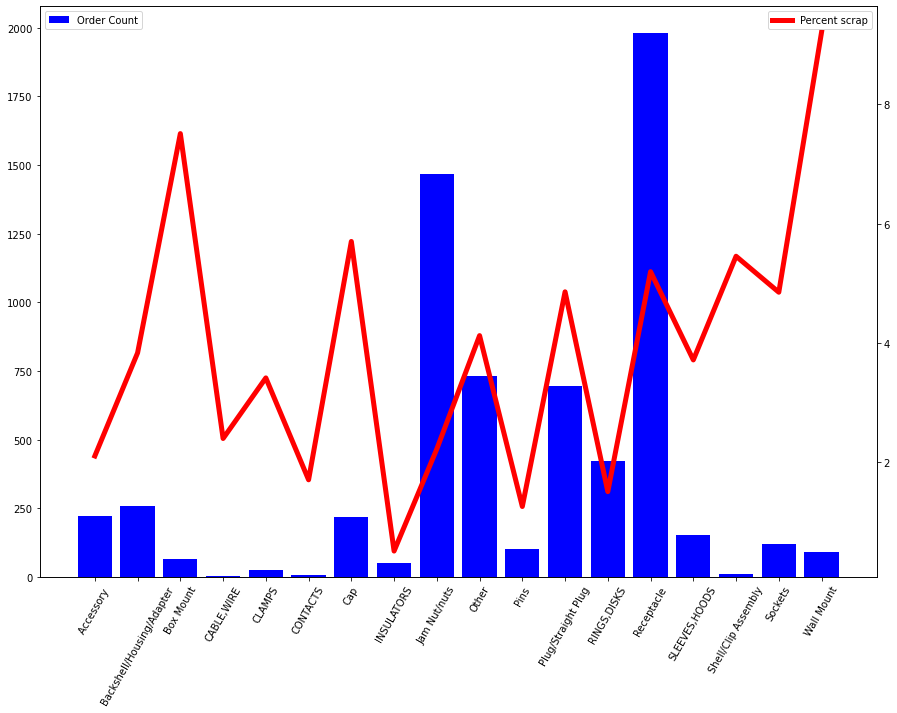

In [156]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10.5)
ax2 = ax.twinx()
ax.bar(analysis.index, analysis["Count"], color='blue', label='Order Count')
ax2.plot(analysis.index, analysis["% scrap"], color='red', label='Percent scrap', linewidth=5)
ax.set_xticklabels(analysis.index, rotation=60)
ax.legend(loc='best')
ax2.legend(loc='best')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')


# Highest Scrap % items:

## Box Mount 
## Cap 
## Wall Mount



C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_20168/3204060363.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(analysis.index, rotation=60)


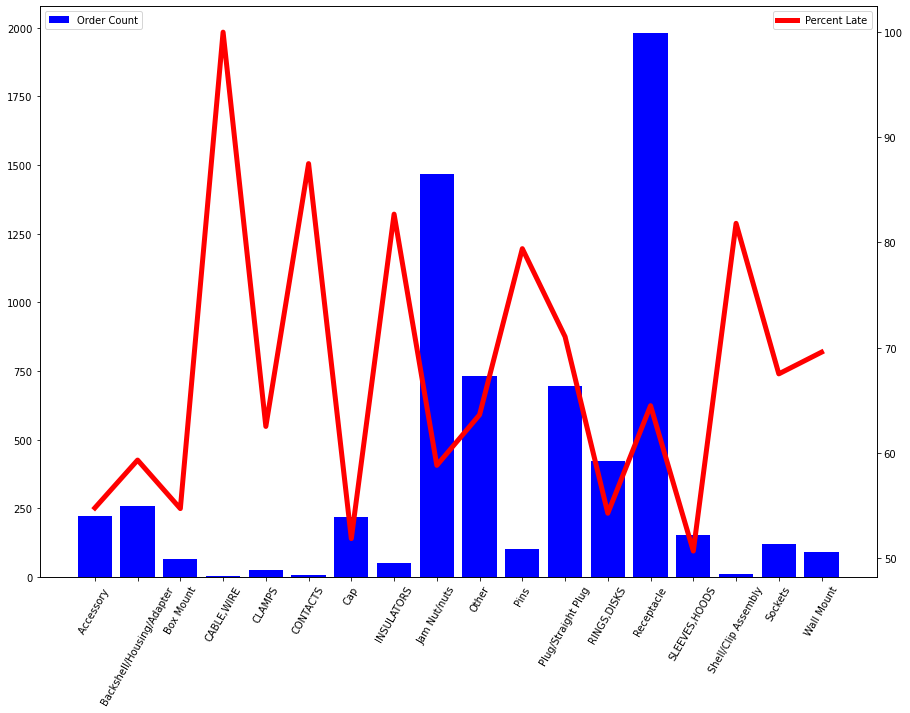

In [155]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10.5)
ax2 = ax.twinx()
ax.bar(analysis.index, analysis["Count"], color='blue', label='Order Count')
ax2.plot(analysis.index, analysis["% late"], color='red', label='Percent Late', linewidth=5)
ax.set_xticklabels(analysis.index, rotation=60)
ax.legend(loc='best')
ax2.legend(loc='best')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Highest Percent Late Items

## Cable, Wire 
## Contacts 
## Insulators
## Pins
## Shell Clip Assembly

In [104]:
series=pd.read_excel('series_breakdown.xlsx')

In [105]:
series

,PART FAMILY SERIES,SERIES DESCRIPTION
0,A,26482
1,B,2M
2,C,5015
3,D,DUALOK
4,E,OVAL CONTACT SYSTEM
5,F,FIBER OPTIC MISC COMPONENTS & SUB ASSEMBLIES
6,G,MILITARY GT
7,H,Hermetic
8,J,JT
9,K,SERIES 348


In [106]:
series_analysis = pd.merge(merge, series, how="left", on="PART FAMILY SERIES")

In [107]:
series_analysis

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,WOTYPE,CREATED BY,STS,PRIMARY WC,ITEM DESC,SCH DT CHG CNT,Days Late,Days Late Int,Late (y/n),MA,Count,CO,PART TYPE,PART SUB TYPE,PART SIZE,PART FAMILY SERIES,PART FRONT FEATURES,PART BACK FEATURES,RAW MATERIAL TYPE,RAW MATERIAL SHAPE,RAW SIZE,SECOND RAW MAT DIM,SERIES DESCRIPTION
0,D49,P70,2021-01-05,2020-11-25,2021-01-07,5151260,21-033467-146,380,380,1,N,B125342,75,NaN,"INSULTATOR, SPLIT -10G BASE-T",1,43 days,43.0,1,NaN,1,100.0,H,K,14,Z,NaN,NaN,Z,Z,0.00,0.0,Other
1,D49,X67,2021-01-05,2020-11-16,2021-01-08,5151040,10-660424-17B,20,19,1,N,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,53 days,53.0,1,NaN,1,100.0,S,R,17,T,NaN,NaN,Z,Z,0.00,0.0,TV
2,D49,X67,2021-01-05,2020-11-12,2021-01-08,5151060,10-660424-25B,50,49,1,N,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,57 days,57.0,1,NaN,1,100.0,S,R,25,T,NaN,NaN,Z,Z,0.00,0.0,TV
3,D49,P56,2021-01-06,2020-08-27,2021-01-08,5152870,10-646069-148,25,19,7,N,B125342,70,P5128,"PLATE, ALIGNMENT -21-65",0,134 days,134.0,1,NaN,1,100.0,H,T,14,T,NaN,NaN,P,C,1.25,0.0,TV
4,D49,F46,2021-01-05,2021-01-14,2021-01-11,5151880,21-113597-020,25,25,0,N,B125342,70,F5176,RING,0,-3 days,-3.0,0,NaN,1,100.0,H,G,20,Y,NaN,NaN,3,C,1.25,0.0,Filter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,D49,P56,2022-03-25,2022-05-23,2022-04-28,2792860,10-646069-101,110,109,1,N,B125342,50,P5128,"PLATE, ALIGNMENT -19-AB",1,-25 days,-25.0,0,3.20,1,100.0,H,T,10,T,NaN,NaN,P,C,1.00,0.0,TV
7045,D49,P57,2022-03-21,2022-02-22,2022-04-28,2749510,10-768190-25B,30,31,0,N,B125342,50,P5116,"SHELL, RCPT -XXN",0,65 days,65.0,1,5.75,1,100.0,S,R,25,T,NaN,NaN,A,C,2.50,0.0,TV
7046,D49,F46,2022-03-29,2022-04-29,2022-04-28,2826490,SF-114564-179,25,28,1,N,B125342,50,F5176,SHELL ASSY,0,-1 days,-1.0,0,3.85,1,100.0,S,Z,17,Y,NaN,NaN,A,F,0.00,0.0,Filter
7047,D49,X65,2022-03-17,2022-04-08,2022-04-28,2716920,T9-8709-10E,60,60,1,N,B125342,50,X5162,LANYARD RING,0,20 days,20.0,1,-3.65,1,100.0,H,G,09,A,NaN,NaN,3,C,1.00,0.0,26482


In [108]:
series_analysis=series_analysis.set_index(['SERIES DESCRIPTION'])

In [109]:
series_analysis

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,WOTYPE,CREATED BY,STS,PRIMARY WC,ITEM DESC,SCH DT CHG CNT,Days Late,Days Late Int,Late (y/n),MA,Count,CO,PART TYPE,PART SUB TYPE,PART SIZE,PART FAMILY SERIES,PART FRONT FEATURES,PART BACK FEATURES,RAW MATERIAL TYPE,RAW MATERIAL SHAPE,RAW SIZE,SECOND RAW MAT DIM
SERIES DESCRIPTION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Other,D49,P70,2021-01-05,2020-11-25,2021-01-07,5151260,21-033467-146,380,380,1,N,B125342,75,NaN,"INSULTATOR, SPLIT -10G BASE-T",1,43 days,43.0,1,NaN,1,100.0,H,K,14,Z,NaN,NaN,Z,Z,0.00,0.0
TV,D49,X67,2021-01-05,2020-11-16,2021-01-08,5151040,10-660424-17B,20,19,1,N,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,53 days,53.0,1,NaN,1,100.0,S,R,17,T,NaN,NaN,Z,Z,0.00,0.0
TV,D49,X67,2021-01-05,2020-11-12,2021-01-08,5151060,10-660424-25B,50,49,1,N,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,57 days,57.0,1,NaN,1,100.0,S,R,25,T,NaN,NaN,Z,Z,0.00,0.0
TV,D49,P56,2021-01-06,2020-08-27,2021-01-08,5152870,10-646069-148,25,19,7,N,B125342,70,P5128,"PLATE, ALIGNMENT -21-65",0,134 days,134.0,1,NaN,1,100.0,H,T,14,T,NaN,NaN,P,C,1.25,0.0
Filter,D49,F46,2021-01-05,2021-01-14,2021-01-11,5151880,21-113597-020,25,25,0,N,B125342,70,F5176,RING,0,-3 days,-3.0,0,NaN,1,100.0,H,G,20,Y,NaN,NaN,3,C,1.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TV,D49,P56,2022-03-25,2022-05-23,2022-04-28,2792860,10-646069-101,110,109,1,N,B125342,50,P5128,"PLATE, ALIGNMENT -19-AB",1,-25 days,-25.0,0,3.20,1,100.0,H,T,10,T,NaN,NaN,P,C,1.00,0.0
TV,D49,P57,2022-03-21,2022-02-22,2022-04-28,2749510,10-768190-25B,30,31,0,N,B125342,50,P5116,"SHELL, RCPT -XXN",0,65 days,65.0,1,5.75,1,100.0,S,R,25,T,NaN,NaN,A,C,2.50,0.0
Filter,D49,F46,2022-03-29,2022-04-29,2022-04-28,2826490,SF-114564-179,25,28,1,N,B125342,50,F5176,SHELL ASSY,0,-1 days,-1.0,0,3.85,1,100.0,S,Z,17,Y,NaN,NaN,A,F,0.00,0.0


In [110]:
series_analysis=series_analysis.groupby("SERIES DESCRIPTION").sum()

In [111]:
series_analysis=series_analysis[['Late (y/n)', 'Count', 'QTY TO STOCK','QTY SCRAP', 'ORIG QTY']]

In [112]:
series_analysis

,Late (y/n),Count,QTY TO STOCK,QTY SCRAP,ORIG QTY
SERIES DESCRIPTION,,,,,
26482,37,64,6726,90,6772
2M,166,233,17687,775,18412
5015,237,449,44768,1824,46721
DUALOK,5,5,394,27,420
FIBER OPTIC MISC COMPONENTS & SUB ASSEMBLIES,51,64,2655,86,2698
Filter,581,916,57613,2989,60277
Hermetic,142,258,28274,742,28982
High Voltage 38999,8,13,313,37,365
JT,132,250,31311,1159,32422


In [113]:
series_analysis['% late']=(series_analysis['Late (y/n)']/series_analysis['Count'])*100
series_analysis['% scrap']=(series_analysis['QTY SCRAP']/series_analysis['ORIG QTY'])*100

In [114]:
series_analysis['% scrap']=(series_analysis['QTY SCRAP']/series_analysis['ORIG QTY'])*100

In [115]:
series_analysis

,Late (y/n),Count,QTY TO STOCK,QTY SCRAP,ORIG QTY,% late,% scrap
SERIES DESCRIPTION,,,,,,,
26482,37,64,6726,90,6772,57.812500,1.329002
2M,166,233,17687,775,18412,71.244635,4.209211
5015,237,449,44768,1824,46721,52.783964,3.904026
DUALOK,5,5,394,27,420,100.000000,6.428571
FIBER OPTIC MISC COMPONENTS & SUB ASSEMBLIES,51,64,2655,86,2698,79.687500,3.187546
Filter,581,916,57613,2989,60277,63.427948,4.958774
Hermetic,142,258,28274,742,28982,55.038760,2.560210
High Voltage 38999,8,13,313,37,365,61.538462,10.136986
JT,132,250,31311,1159,32422,52.800000,3.574733


C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_20168/3807437527.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(series_analysis.index, rotation=80)


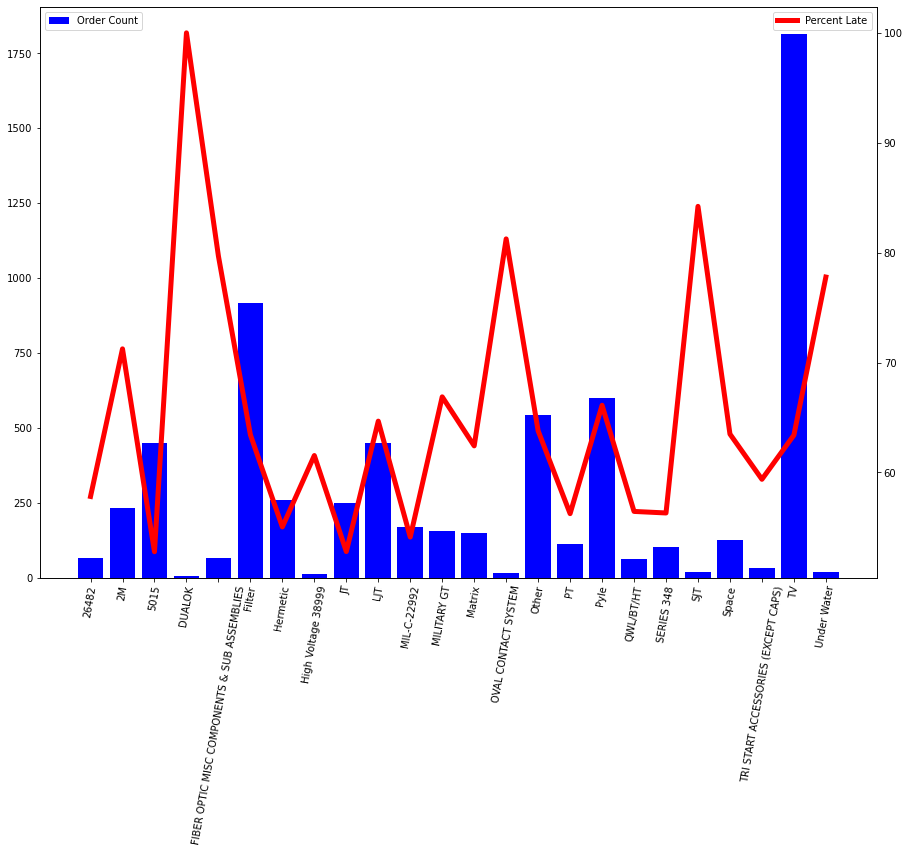

In [154]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10.5)
ax2 = ax.twinx()
ax.bar(series_analysis.index, series_analysis["Count"], color='blue', label='Order Count')
ax2.plot(series_analysis.index, series_analysis["% late"], color='red', label='Percent Late', linewidth=5)
ax.set_xticklabels(series_analysis.index, rotation=80)
ax.legend(loc='best')
ax2.legend(loc='best')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Highest Percent Late Items

## Dualock 
## Oval Contact System
## SJT
## Under Water
## 2M

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_20168/1337240848.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(series_analysis.index, rotation=80)


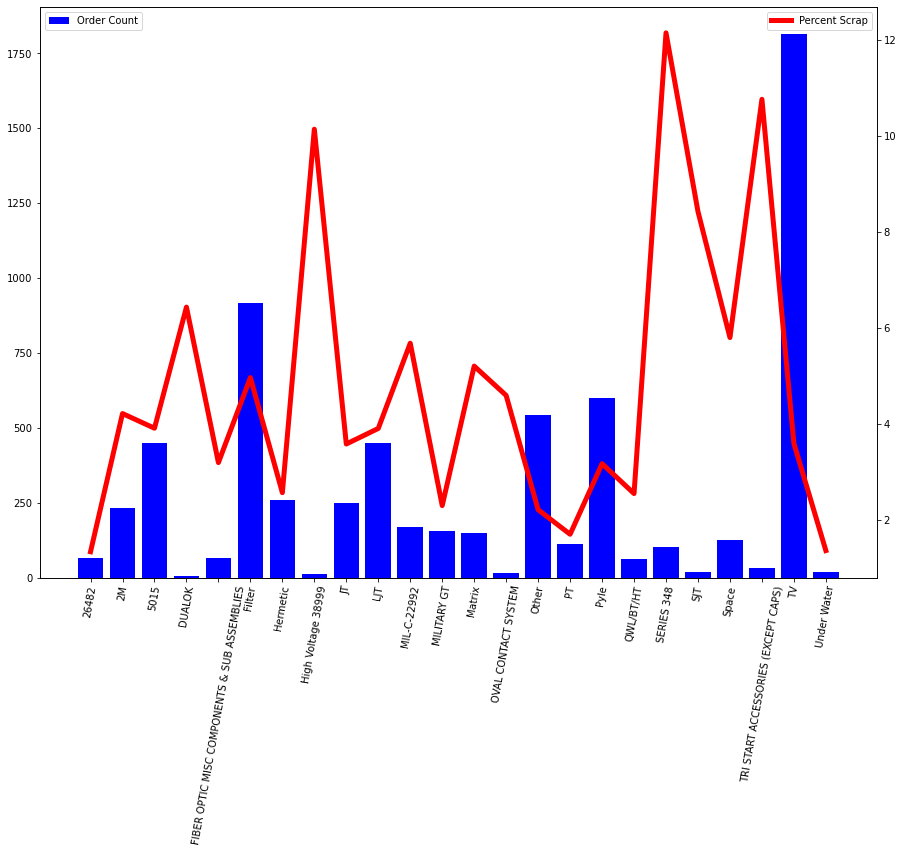

In [153]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10.5)
ax2 = ax.twinx()
ax.bar(series_analysis.index, series_analysis["Count"], color='blue', label='Order Count')
ax2.plot(series_analysis.index, series_analysis["% scrap"], color='red', label='Percent Scrap', linewidth=5)
ax.set_xticklabels(series_analysis.index, rotation=80)
ax.legend(loc='best')
ax2.legend(loc='best')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Highest Percent Scrap

## Series 348
## Tri Start Accessories
## High Voltage 38999
## Dualok


In [137]:
merge

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,WOTYPE,CREATED BY,STS,PRIMARY WC,ITEM DESC,SCH DT CHG CNT,Days Late,Days Late Int,Late (y/n),MA,Count,CO,PART TYPE,PART SUB TYPE,PART SIZE,PART FAMILY SERIES,PART FRONT FEATURES,PART BACK FEATURES,RAW MATERIAL TYPE,RAW MATERIAL SHAPE,RAW SIZE,SECOND RAW MAT DIM
0,D49,P70,2021-01-05,2020-11-25,2021-01-07,5151260,21-033467-146,380,380,1,N,B125342,75,NaN,"INSULTATOR, SPLIT -10G BASE-T",1,43 days,43.0,1,NaN,1,100.0,H,K,14,Z,NaN,NaN,Z,Z,0.00,0.0
1,D49,X67,2021-01-05,2020-11-16,2021-01-08,5151040,10-660424-17B,20,19,1,N,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,53 days,53.0,1,NaN,1,100.0,S,R,17,T,NaN,NaN,Z,Z,0.00,0.0
2,D49,X67,2021-01-05,2020-11-12,2021-01-08,5151060,10-660424-25B,50,49,1,N,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,57 days,57.0,1,NaN,1,100.0,S,R,25,T,NaN,NaN,Z,Z,0.00,0.0
3,D49,P56,2021-01-06,2020-08-27,2021-01-08,5152870,10-646069-148,25,19,7,N,B125342,70,P5128,"PLATE, ALIGNMENT -21-65",0,134 days,134.0,1,NaN,1,100.0,H,T,14,T,NaN,NaN,P,C,1.25,0.0
4,D49,F46,2021-01-05,2021-01-14,2021-01-11,5151880,21-113597-020,25,25,0,N,B125342,70,F5176,RING,0,-3 days,-3.0,0,NaN,1,100.0,H,G,20,Y,NaN,NaN,3,C,1.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,D49,P56,2022-03-25,2022-05-23,2022-04-28,2792860,10-646069-101,110,109,1,N,B125342,50,P5128,"PLATE, ALIGNMENT -19-AB",1,-25 days,-25.0,0,3.20,1,100.0,H,T,10,T,NaN,NaN,P,C,1.00,0.0
7045,D49,P57,2022-03-21,2022-02-22,2022-04-28,2749510,10-768190-25B,30,31,0,N,B125342,50,P5116,"SHELL, RCPT -XXN",0,65 days,65.0,1,5.75,1,100.0,S,R,25,T,NaN,NaN,A,C,2.50,0.0
7046,D49,F46,2022-03-29,2022-04-29,2022-04-28,2826490,SF-114564-179,25,28,1,N,B125342,50,F5176,SHELL ASSY,0,-1 days,-1.0,0,3.85,1,100.0,S,Z,17,Y,NaN,NaN,A,F,0.00,0.0
7047,D49,X65,2022-03-17,2022-04-08,2022-04-28,2716920,T9-8709-10E,60,60,1,N,B125342,50,X5162,LANYARD RING,0,20 days,20.0,1,-3.65,1,100.0,H,G,09,A,NaN,NaN,3,C,1.00,0.0


In [139]:
bu=pd.read_excel('business_units.xlsx')

In [140]:
bu

,PART NUMBER,BU
0,A41201836LDY165,COM
1,BA-4012-36LD,HSI
2,BA-4012-50LD,COM
3,BA-4016-10P,COM
4,BA-4016-10R,COM
...,...,...
22111,SGF21121479-020,FIL
22112,10-711644-036,M/A
22113,10-711965-036,M/A
22114,10-711644-032,M/A


In [141]:
bu_analysis = pd.merge(merge, bu, how="left", on="PART NUMBER")

In [142]:
bu_analysis

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,WOTYPE,CREATED BY,STS,PRIMARY WC,ITEM DESC,SCH DT CHG CNT,Days Late,Days Late Int,Late (y/n),MA,Count,CO,PART TYPE,PART SUB TYPE,PART SIZE,PART FAMILY SERIES,PART FRONT FEATURES,PART BACK FEATURES,RAW MATERIAL TYPE,RAW MATERIAL SHAPE,RAW SIZE,SECOND RAW MAT DIM,BU
0,D49,P70,2021-01-05,2020-11-25,2021-01-07,5151260,21-033467-146,380,380,1,N,B125342,75,NaN,"INSULTATOR, SPLIT -10G BASE-T",1,43 days,43.0,1,NaN,1,100.0,H,K,14,Z,NaN,NaN,Z,Z,0.00,0.0,HSI
1,D49,X67,2021-01-05,2020-11-16,2021-01-08,5151040,10-660424-17B,20,19,1,N,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,53 days,53.0,1,NaN,1,100.0,S,R,17,T,NaN,NaN,Z,Z,0.00,0.0,M/A
2,D49,X67,2021-01-05,2020-11-12,2021-01-08,5151060,10-660424-25B,50,49,1,N,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,57 days,57.0,1,NaN,1,100.0,S,R,25,T,NaN,NaN,Z,Z,0.00,0.0,M/A
3,D49,P56,2021-01-06,2020-08-27,2021-01-08,5152870,10-646069-148,25,19,7,N,B125342,70,P5128,"PLATE, ALIGNMENT -21-65",0,134 days,134.0,1,NaN,1,100.0,H,T,14,T,NaN,NaN,P,C,1.25,0.0,M/A
4,D49,F46,2021-01-05,2021-01-14,2021-01-11,5151880,21-113597-020,25,25,0,N,B125342,70,F5176,RING,0,-3 days,-3.0,0,NaN,1,100.0,H,G,20,Y,NaN,NaN,3,C,1.25,0.0,FIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7046,D49,P56,2022-03-25,2022-05-23,2022-04-28,2792860,10-646069-101,110,109,1,N,B125342,50,P5128,"PLATE, ALIGNMENT -19-AB",1,-25 days,-25.0,0,3.20,1,100.0,H,T,10,T,NaN,NaN,P,C,1.00,0.0,M/A
7047,D49,P57,2022-03-21,2022-02-22,2022-04-28,2749510,10-768190-25B,30,31,0,N,B125342,50,P5116,"SHELL, RCPT -XXN",0,65 days,65.0,1,5.75,1,100.0,S,R,25,T,NaN,NaN,A,C,2.50,0.0,M/A
7048,D49,F46,2022-03-29,2022-04-29,2022-04-28,2826490,SF-114564-179,25,28,1,N,B125342,50,F5176,SHELL ASSY,0,-1 days,-1.0,0,3.85,1,100.0,S,Z,17,Y,NaN,NaN,A,F,0.00,0.0,FIL
7049,D49,X65,2022-03-17,2022-04-08,2022-04-28,2716920,T9-8709-10E,60,60,1,N,B125342,50,X5162,LANYARD RING,0,20 days,20.0,1,-3.65,1,100.0,H,G,09,A,NaN,NaN,3,C,1.00,0.0,COM


In [144]:
bu_analysis=bu_analysis.set_index(['BU'])

In [145]:
bu_analysis=bu_analysis.groupby("BU").sum()

In [146]:
bu_analysis

,ORIG QTY,QTY TO STOCK,QTY SCRAP,STS,SCH DT CHG CNT,Days Late Int,Late (y/n),MA,Count,CO,PART FRONT FEATURES,PART BACK FEATURES,RAW SIZE,SECOND RAW MAT DIM
BU,,,,,,,,,,,,,,
BDL,3360,3300,16,430,8,-466.0,3,2.60,6,600.0,0.0,0.0,3.750,0.0
COM,99127,95169,3655,72965,383,8462.0,700,8438.45,1026,102600.0,0.0,0.0,1325.495,0.0
FIL,61833,59083,3061,66410,320,11185.0,592,7149.05,937,93700.0,0.0,0.0,1575.934,0.0
HSI,39619,38723,809,25750,216,9056.0,285,3153.70,364,36400.0,0.0,0.0,243.562,0.0
IND,37484,35922,1490,22915,227,1232.0,192,2210.10,325,32500.0,0.0,0.0,519.934,0.0
M/A,389013,375252,14033,280990,2257,7599.0,2362,27265.15,3969,396900.0,0.0,0.0,6379.264,0.0


In [147]:
bu_analysis['% late']=(bu_analysis['Late (y/n)']/bu_analysis['Count'])*100
bu_analysis['% scrap']=(bu_analysis['QTY SCRAP']/bu_analysis['ORIG QTY'])*100

In [148]:
bu_analysis

,ORIG QTY,QTY TO STOCK,QTY SCRAP,STS,SCH DT CHG CNT,Days Late Int,Late (y/n),MA,Count,CO,PART FRONT FEATURES,PART BACK FEATURES,RAW SIZE,SECOND RAW MAT DIM,% late,% scrap
BU,,,,,,,,,,,,,,,,
BDL,3360,3300,16,430,8,-466.0,3,2.60,6,600.0,0.0,0.0,3.750,0.0,50.000000,0.476190
COM,99127,95169,3655,72965,383,8462.0,700,8438.45,1026,102600.0,0.0,0.0,1325.495,0.0,68.226121,3.687189
FIL,61833,59083,3061,66410,320,11185.0,592,7149.05,937,93700.0,0.0,0.0,1575.934,0.0,63.180363,4.950431
HSI,39619,38723,809,25750,216,9056.0,285,3153.70,364,36400.0,0.0,0.0,243.562,0.0,78.296703,2.041950
IND,37484,35922,1490,22915,227,1232.0,192,2210.10,325,32500.0,0.0,0.0,519.934,0.0,59.076923,3.975029
M/A,389013,375252,14033,280990,2257,7599.0,2362,27265.15,3969,396900.0,0.0,0.0,6379.264,0.0,59.511212,3.607334


C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_20168/3623867396.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bu_analysis.index, rotation=80)


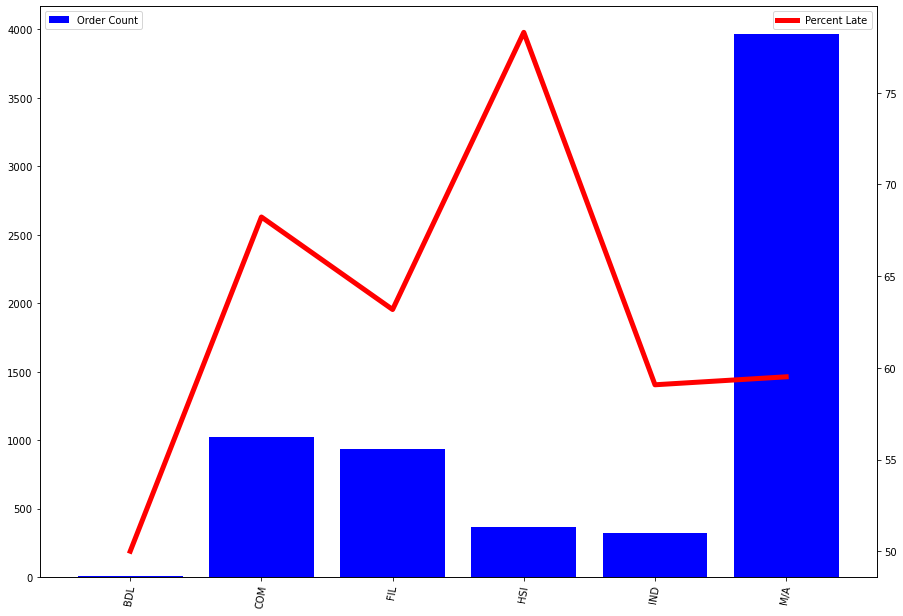

In [152]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10.5)
ax2 = ax.twinx()
ax.bar(bu_analysis.index, bu_analysis["Count"], color='blue', label='Order Count')
ax2.plot(bu_analysis.index, bu_analysis["% late"], color='red', label='Percent Late', linewidth=5)
ax.set_xticklabels(bu_analysis.index, rotation=80)
ax.legend(loc='best')
ax2.legend(loc='best')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_20168/399607618.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bu_analysis.index, rotation=80)


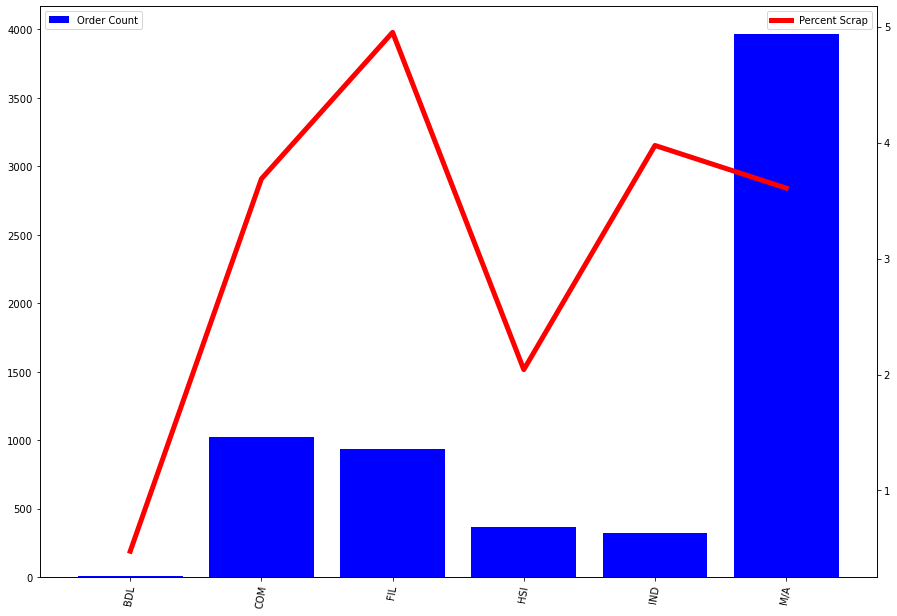

In [151]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10.5)
ax2 = ax.twinx()
ax.bar(bu_analysis.index, bu_analysis["Count"], color='blue', label='Order Count')
ax2.plot(bu_analysis.index, bu_analysis["% scrap"], color='red', label='Percent Scrap', linewidth=5)
ax.set_xticklabels(bu_analysis.index, rotation=80)
ax.legend(loc='best')
ax2.legend(loc='best')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

In [159]:
size_analysis=merge.set_index(['PART SIZE'])

In [160]:
size_analysis

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,WOTYPE,CREATED BY,STS,PRIMARY WC,ITEM DESC,SCH DT CHG CNT,Days Late,Days Late Int,Late (y/n),MA,Count,CO,PART TYPE,PART SUB TYPE,PART FAMILY SERIES,PART FRONT FEATURES,PART BACK FEATURES,RAW MATERIAL TYPE,RAW MATERIAL SHAPE,RAW SIZE,SECOND RAW MAT DIM
PART SIZE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14,D49,P70,2021-01-05,2020-11-25,2021-01-07,5151260,21-033467-146,380,380,1,N,B125342,75,NaN,"INSULTATOR, SPLIT -10G BASE-T",1,43 days,43.0,1,NaN,1,100.0,H,K,Z,NaN,NaN,Z,Z,0.00,0.0
17,D49,X67,2021-01-05,2020-11-16,2021-01-08,5151040,10-660424-17B,20,19,1,N,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,53 days,53.0,1,NaN,1,100.0,S,R,T,NaN,NaN,Z,Z,0.00,0.0
25,D49,X67,2021-01-05,2020-11-12,2021-01-08,5151060,10-660424-25B,50,49,1,N,B125342,70,X5167,"SHELL, RCPT -TVP00R -XXN",0,57 days,57.0,1,NaN,1,100.0,S,R,T,NaN,NaN,Z,Z,0.00,0.0
14,D49,P56,2021-01-06,2020-08-27,2021-01-08,5152870,10-646069-148,25,19,7,N,B125342,70,P5128,"PLATE, ALIGNMENT -21-65",0,134 days,134.0,1,NaN,1,100.0,H,T,T,NaN,NaN,P,C,1.25,0.0
20,D49,F46,2021-01-05,2021-01-14,2021-01-11,5151880,21-113597-020,25,25,0,N,B125342,70,F5176,RING,0,-3 days,-3.0,0,NaN,1,100.0,H,G,Y,NaN,NaN,3,C,1.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,D49,P56,2022-03-25,2022-05-23,2022-04-28,2792860,10-646069-101,110,109,1,N,B125342,50,P5128,"PLATE, ALIGNMENT -19-AB",1,-25 days,-25.0,0,3.20,1,100.0,H,T,T,NaN,NaN,P,C,1.00,0.0
25,D49,P57,2022-03-21,2022-02-22,2022-04-28,2749510,10-768190-25B,30,31,0,N,B125342,50,P5116,"SHELL, RCPT -XXN",0,65 days,65.0,1,5.75,1,100.0,S,R,T,NaN,NaN,A,C,2.50,0.0
17,D49,F46,2022-03-29,2022-04-29,2022-04-28,2826490,SF-114564-179,25,28,1,N,B125342,50,F5176,SHELL ASSY,0,-1 days,-1.0,0,3.85,1,100.0,S,Z,Y,NaN,NaN,A,F,0.00,0.0


In [161]:
size_analysis=size_analysis.groupby("PART SIZE").sum()

In [162]:
size_analysis

,ORIG QTY,QTY TO STOCK,QTY SCRAP,STS,SCH DT CHG CNT,Days Late Int,Late (y/n),MA,Count,CO,PART FRONT FEATURES,PART BACK FEATURES,RAW SIZE,SECOND RAW MAT DIM
PART SIZE,,,,,,,,,,,,,,
17,25,28,1,50,0,-1.0,0,3.85,1,100.0,0.0,0.0,0.000,0.0
20,30,30,0,70,0,57.0,1,30.85,1,100.0,0.0,0.0,0.000,0.0
02,85,76,3,75,1,-196.0,0,-3.05,1,100.0,0.0,0.0,1.125,0.0
03,439,452,1,280,0,34.0,3,-12.65,4,400.0,0.0,0.0,4.500,0.0
04,3075,3061,6,425,6,-184.0,4,-14.15,6,600.0,0.0,0.0,5.250,0.0
05,698,648,58,895,4,513.0,10,100.00,13,1300.0,0.0,0.0,12.250,0.0
06,1440,1366,50,1360,7,935.0,16,52.90,19,1900.0,0.0,0.0,18.125,0.0
07,2135,2112,44,1680,10,367.0,15,96.60,24,2400.0,0.0,0.0,22.500,0.0
08,20638,19450,1071,13650,108,999.0,117,1934.85,192,19200.0,0.0,0.0,171.563,0.0


In [163]:
size_analysis['% late']=(size_analysis['Late (y/n)']/size_analysis['Count'])*100
size_analysis['% scrap']=(size_analysis['QTY SCRAP']/size_analysis['ORIG QTY'])*100

In [164]:
size_analysis

,ORIG QTY,QTY TO STOCK,QTY SCRAP,STS,SCH DT CHG CNT,Days Late Int,Late (y/n),MA,Count,CO,PART FRONT FEATURES,PART BACK FEATURES,RAW SIZE,SECOND RAW MAT DIM,% late,% scrap
PART SIZE,,,,,,,,,,,,,,,,
17,25,28,1,50,0,-1.0,0,3.85,1,100.0,0.0,0.0,0.000,0.0,0.000000,4.000000
20,30,30,0,70,0,57.0,1,30.85,1,100.0,0.0,0.0,0.000,0.0,100.000000,0.000000
02,85,76,3,75,1,-196.0,0,-3.05,1,100.0,0.0,0.0,1.125,0.0,0.000000,3.529412
03,439,452,1,280,0,34.0,3,-12.65,4,400.0,0.0,0.0,4.500,0.0,75.000000,0.227790
04,3075,3061,6,425,6,-184.0,4,-14.15,6,600.0,0.0,0.0,5.250,0.0,66.666667,0.195122
05,698,648,58,895,4,513.0,10,100.00,13,1300.0,0.0,0.0,12.250,0.0,76.923077,8.309456
06,1440,1366,50,1360,7,935.0,16,52.90,19,1900.0,0.0,0.0,18.125,0.0,84.210526,3.472222
07,2135,2112,44,1680,10,367.0,15,96.60,24,2400.0,0.0,0.0,22.500,0.0,62.500000,2.060890
08,20638,19450,1071,13650,108,999.0,117,1934.85,192,19200.0,0.0,0.0,171.563,0.0,60.937500,5.189456


In [165]:
size_analysis=size_analysis[['Late (y/n)', 'Count', 'QTY TO STOCK','QTY SCRAP', 'ORIG QTY']]

In [166]:
size_analysis

,Late (y/n),Count,QTY TO STOCK,QTY SCRAP,ORIG QTY
PART SIZE,,,,,
17,0,1,28,1,25
20,1,1,30,0,30
02,0,1,76,3,85
03,3,4,452,1,439
04,4,6,3061,6,3075
05,10,13,648,58,698
06,16,19,1366,50,1440
07,15,24,2112,44,2135
08,117,192,19450,1071,20638


In [167]:
size_analysis['% late']=(size_analysis['Late (y/n)']/size_analysis['Count'])*100
size_analysis['% scrap']=(size_analysis['QTY SCRAP']/size_analysis['ORIG QTY'])*100

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_20168/2976322108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size_analysis['% late']=(size_analysis['Late (y/n)']/size_analysis['Count'])*100
C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_20168/2976322108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size_analysis['% scrap']=(size_analysis['QTY SCRAP']/size_analysis['ORIG QTY'])*100


In [168]:
size_analysis

,Late (y/n),Count,QTY TO STOCK,QTY SCRAP,ORIG QTY,% late,% scrap
PART SIZE,,,,,,,
17,0,1,28,1,25,0.000000,4.000000
20,1,1,30,0,30,100.000000,0.000000
02,0,1,76,3,85,0.000000,3.529412
03,3,4,452,1,439,75.000000,0.227790
04,4,6,3061,6,3075,66.666667,0.195122
05,10,13,648,58,698,76.923077,8.309456
06,16,19,1366,50,1440,84.210526,3.472222
07,15,24,2112,44,2135,62.500000,2.060890
08,117,192,19450,1071,20638,60.937500,5.189456
